## Create new Candidate entity file with simpler synonyms

**Nota Bene:**
in the Chatbot objectives the `Solution to handle spelling mistakes of candidates in chatbot users' questions` was defined as a `Should have`. Given the issues in the chatbot caused by similar synonyms, this file simplifies them to see whether we can fix the multiple entity extraction with a simpler solution.

This new file must have 3 entities:

<ol>
<li>Candidates in GC</li>
<li>Candidates in CE</li>
<li>Candidates in GC & CE</li>
</ol>

In [433]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

%matplotlib inline

In [458]:
# import files
df = pd.read_csv('./electionBot_sBox/archive/candidates-Entities_v5.csv')
df.head()

,entity,value,synonyms
0,Depute_e,PAGANI Rémy,rémy:pagani:Remy:pagani
1,Depute_e,WENGER Saliha,saliha:wenger:salika:saliha:wenger:Salika
2,Depute_e,ZAUGG Christian,christian:zaugg:zaug:zog:zogg:christian:zaugg:...
3,Depute_e,HALLER Jocelyne,jocelyne:haller:haler:Jocelyne:haller:haul
4,Depute_e,ENILINE Alexander,alexander:eniline:alexander:eniline


In [459]:
# add new synonyms colum
df['synonyms'] = df['value'].str.split()

In [460]:
# problem case - to fix
df['synonyms'].iloc[457]

["L'HUILLIER", 'Eric']

In [461]:
df.head()

,entity,value,synonyms
0,Depute_e,PAGANI Rémy,"[PAGANI, Rémy]"
1,Depute_e,WENGER Saliha,"[WENGER, Saliha]"
2,Depute_e,ZAUGG Christian,"[ZAUGG, Christian]"
3,Depute_e,HALLER Jocelyne,"[HALLER, Jocelyne]"
4,Depute_e,ENILINE Alexander,"[ENILINE, Alexander]"


In [462]:
# extract string from list
df['synonyms'] = df.synonyms.astype(str).str.replace('\[|\]|\'', '')

In [463]:
# title case
df['synonyms'] = df['synonyms'].str.title();

In [464]:
# remove accents and special characters
df['synonyms'].replace(regex=True,inplace=True,to_replace='à',value='a')
df['synonyms'].replace(regex=True,inplace=True,to_replace='â',value='a')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ä',value='a')
df['synonyms'].replace(regex=True,inplace=True,to_replace='é',value='e')
df['synonyms'].replace(regex=True,inplace=True,to_replace='è',value='e')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ê',value='e')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ï',value='i')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ö',value='o')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ô',value='o')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ù',value='u')
df['synonyms'].replace(regex=True,inplace=True,to_replace='ü',value='u')
# remove spec chars from local-commune_nom
df['synonyms'].replace(regex=True,inplace=True,to_replace=" - ",value=' ')
df['synonyms'].replace(regex=True,inplace=True,to_replace="-",value=' ')
df['synonyms'].replace(regex=True,inplace=True,to_replace="'",value=' ')
df['synonyms'].replace(regex=True,inplace=True,to_replace="L'",value='l:')
df['synonyms'].replace(regex=True,inplace=True,to_replace='"',value='')

In [465]:
# format synonyms column
df['synonyms'].replace(regex=True,inplace=True,to_replace=", ",value=':')

In [466]:
df['synonyms'].iloc[457]

'Lhuillier:Eric'

In [467]:
df.head()

,entity,value,synonyms
0,Depute_e,PAGANI Rémy,Pagani:Remy
1,Depute_e,WENGER Saliha,Wenger:Saliha
2,Depute_e,ZAUGG Christian,Zaugg:Christian
3,Depute_e,HALLER Jocelyne,Haller:Jocelyne
4,Depute_e,ENILINE Alexander,Eniline:Alexander


In [468]:
# rename column and add new column
df.rename(index=str, columns={"entity": "initialEntity"}, inplace=True)
df['entity'] = ''
df.head()

,initialEntity,value,synonyms,entity
0,Depute_e,PAGANI Rémy,Pagani:Remy,
1,Depute_e,WENGER Saliha,Wenger:Saliha,
2,Depute_e,ZAUGG Christian,Zaugg:Christian,
3,Depute_e,HALLER Jocelyne,Haller:Jocelyne,
4,Depute_e,ENILINE Alexander,Eniline:Alexander,


In [469]:
df.tail()

,initialEntity,value,synonyms,entity
649,Conseiller_ere_d_Etat,ZACHARIAS Ronald,Zacharias:Ronald,
650,Conseiller_ere_d_Etat,VIDONNE Thierry,Vidonne:Thierry,
651,Conseiller_ere_d_Etat,LEITNER André,Leitner:Andre,
652,Conseiller_ere_d_Etat,FONTANA Jérôme,Fontana:Jerome,
653,Conseiller_ere_d_Etat,AMSLER Susanne,Amsler:Susanne,


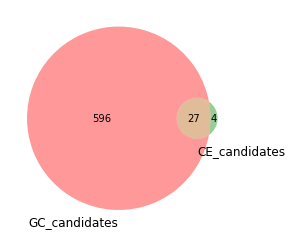

In [470]:
# filter value for each election
GC = df[(df['initialEntity'] == 'Depute_e')]
CE = df[(df['initialEntity'] == 'Conseiller_ere_d_Etat')]
CE_int_GC = df.query('initialEntity == "Depute_e" and initialEntity == "Conseiller_ere_d_Etat"')

plt.figure(figsize=(4,4))
# create sets
CE_candidates = set(CE['value'])
GC_candidates = set(GC['value'])
CE_GC_intersection = CE_candidates.intersection(GC_candidates)

venn2([GC_candidates, CE_candidates], ('GC_candidates', 'CE_candidates'))
plt.show()

In [471]:
# create new sets
GC_only = GC_candidates - CE_GC_intersection
CE_only = CE_candidates - CE_GC_intersection
CE_GC = CE_GC_intersection

In [472]:
# check set creation
CE_only

{'AMBERGER Axel', 'AMSLER Susanne', 'AYMON Paul', 'CRETEGNY Willy'}

In [473]:
len(GC_only)

596

In [474]:
len(CE_only)

4

In [475]:
len(CE_GC)

27

In [476]:
# create dictionnaries from sets
GC_only_dict = dict.fromkeys(GC_only, 'Candidat_GC')
CE_only_dict = dict.fromkeys(CE_only, 'Candidat_CE')
CE_GC_dict = dict.fromkeys(CE_GC, 'Candidat_CE_GC')

In [477]:
# add dictionnary values to entity column of df
df['entity_GC'] = df['value'].map(GC_only_dict)
df['entity_CE'] = df['value'].map(CE_only_dict)
df['entity_CE_GC'] = df['value'].map(CE_GC_dict)
# fillna
df['entity_GC'] = df['entity_GC'].fillna('')
df['entity_CE'] = df['entity_CE'].fillna('')
df['entity_CE_GC'] = df['entity_CE_GC'].fillna('')
df.head()

,initialEntity,value,synonyms,entity,entity_GC,entity_CE,entity_CE_GC
0,Depute_e,PAGANI Rémy,Pagani:Remy,,Candidat_GC,,
1,Depute_e,WENGER Saliha,Wenger:Saliha,,,,Candidat_CE_GC
2,Depute_e,ZAUGG Christian,Zaugg:Christian,,Candidat_GC,,
3,Depute_e,HALLER Jocelyne,Haller:Jocelyne,,,,Candidat_CE_GC
4,Depute_e,ENILINE Alexander,Eniline:Alexander,,Candidat_GC,,


In [478]:
# create new column
df['entity'] = df['entity_GC'] + df['entity_CE'] + df['entity_CE_GC']
df.head()

,initialEntity,value,synonyms,entity,entity_GC,entity_CE,entity_CE_GC
0,Depute_e,PAGANI Rémy,Pagani:Remy,Candidat_GC,Candidat_GC,,
1,Depute_e,WENGER Saliha,Wenger:Saliha,Candidat_CE_GC,,,Candidat_CE_GC
2,Depute_e,ZAUGG Christian,Zaugg:Christian,Candidat_GC,Candidat_GC,,
3,Depute_e,HALLER Jocelyne,Haller:Jocelyne,Candidat_CE_GC,,,Candidat_CE_GC
4,Depute_e,ENILINE Alexander,Eniline:Alexander,Candidat_GC,Candidat_GC,,


In [479]:
# remove old column
df.drop(['initialEntity', 'entity_GC', 'entity_CE', 'entity_CE_GC'], axis=1, inplace=True)
df.head()

,value,synonyms,entity
0,PAGANI Rémy,Pagani:Remy,Candidat_GC
1,WENGER Saliha,Wenger:Saliha,Candidat_CE_GC
2,ZAUGG Christian,Zaugg:Christian,Candidat_GC
3,HALLER Jocelyne,Haller:Jocelyne,Candidat_CE_GC
4,ENILINE Alexander,Eniline:Alexander,Candidat_GC


In [485]:
# drop duplicate columns
df_dropped = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [488]:
# export csv files
df_dropped.to_csv('./electionBot_sBox/entities/candidates-Entities_v7.csv',index=False)